In [63]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

# Pretty display for notebooks
%matplotlib inline

In [64]:
# Load the data 
full_data = pd.read_csv("/Users/derekwang/Desktop/Python/Sales Forecast/training_data_FY18_2H_FY19_All.csv")

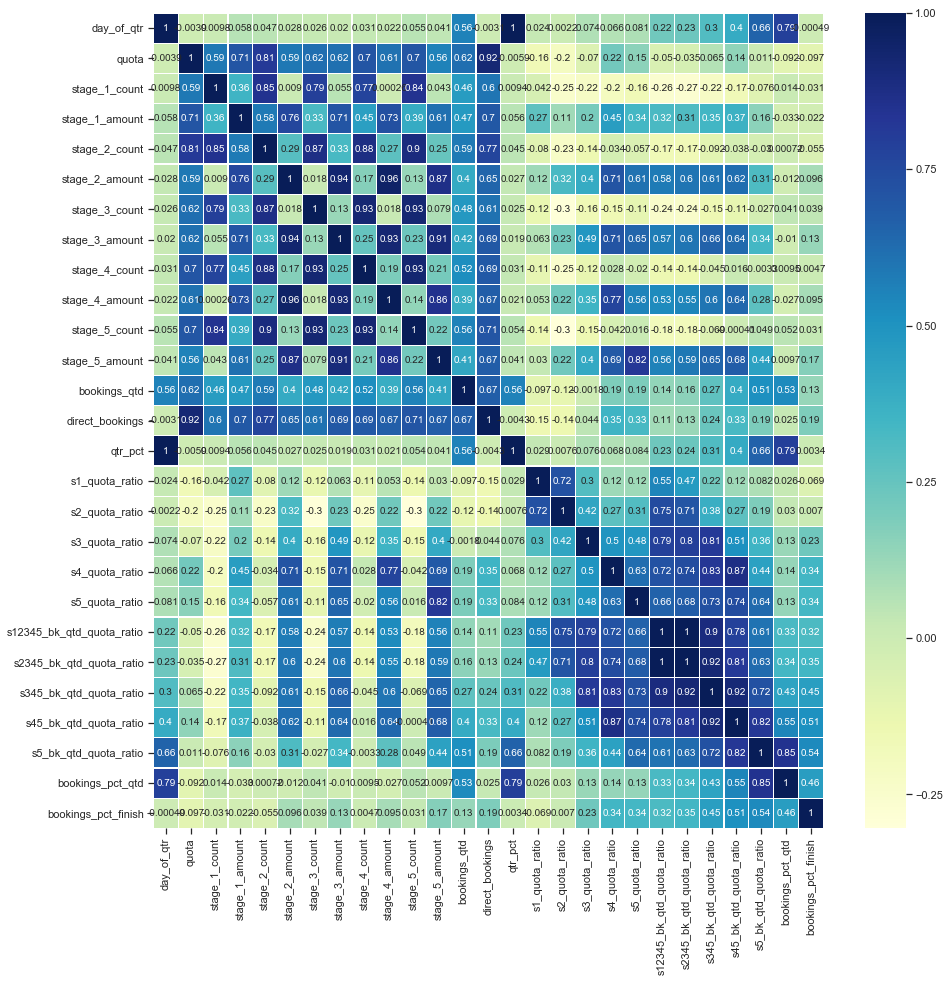

In [72]:
fig, ax = plt.subplots(figsize=(15,15)) #Sample figsize in inches

sns.heatmap(full_data.corr(), annot=True, cmap="YlGnBu", linewidths=.1, ax=ax);

In [66]:
# Define outcome
outcomes_raw = full_data[['bookings_pct_finish']]

# Define features
features_raw = full_data.drop(['bookings_pct_finish'], axis = 1)

# display(features_raw.head())
print(features_raw.columns)
# features_raw.describe()

Index(['dt', 'fy_quarter', 'day_of_qtr', 'sales_div', 'quota', 'stage_1_count',
       'stage_1_amount', 'stage_2_count', 'stage_2_amount', 'stage_3_count',
       'stage_3_amount', 'stage_4_count', 'stage_4_amount', 'stage_5_count',
       'stage_5_amount', 'bookings_qtd', 'direct_bookings', 'qtr_pct',
       's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio',
       's5_quota_ratio', 's12345_bk_qtd_quota_ratio',
       's2345_bk_qtd_quota_ratio', 's345_bk_qtd_quota_ratio',
       's45_bk_qtd_quota_ratio', 's5_bk_qtd_quota_ratio', 'bookings_pct_qtd'],
      dtype='object')


In [44]:
# fill in NA's with 0 - FEATURES
features = features_raw.fillna(0.0)
# display(features.head())
print(features.columns)


# fill in NA's with 0 - OUTCOMES
outcomes = outcomes_raw.fillna(0.0)
# display(outcomes.head())
print(outcomes.columns)

Index(['dt', 'fy_quarter', 'day_of_qtr', 'sales_div', 'quota', 'stage_1_count',
       'stage_1_amount', 'stage_2_count', 'stage_2_amount', 'stage_3_count',
       'stage_3_amount', 'stage_4_count', 'stage_4_amount', 'stage_5_count',
       'stage_5_amount', 'bookings_qtd', 'direct_bookings', 'qtr_pct',
       's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio',
       's5_quota_ratio', 's12345_bk_qtd_quota_ratio',
       's2345_bk_qtd_quota_ratio', 's345_bk_qtd_quota_ratio',
       's45_bk_qtd_quota_ratio', 's5_bk_qtd_quota_ratio', 'bookings_pct_qtd'],
      dtype='object')
Index(['bookings_pct_finish'], dtype='object')


In [45]:
# split test set and train set
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [46]:
# drop features and columns that are not needed

X_train_raw2 = X_train_raw.drop(['dt', 'fy_quarter', 'day_of_qtr', 'quota', 'stage_1_count', 'stage_1_amount', 
                          'stage_2_count', 'stage_2_amount', 'stage_3_count', 'stage_3_amount', 'stage_4_count', 
                          'stage_4_amount', 'stage_5_count', 'stage_5_amount', 'bookings_qtd', 'direct_bookings',
                          's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'
                                ], 
                                axis = 1)

X_test_raw2 = X_test_raw.drop(['dt', 'fy_quarter', 'day_of_qtr', 'quota', 'stage_1_count', 'stage_1_amount', 
                          'stage_2_count', 'stage_2_amount', 'stage_3_count', 'stage_3_amount', 'stage_4_count', 
                          'stage_4_amount', 'stage_5_count', 'stage_5_amount', 'bookings_qtd', 'direct_bookings',
                          's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'
                              ], 
                              axis = 1)


In [47]:
# One-hot encoding
X_train = pd.get_dummies(X_train_raw2)
X_test = pd.get_dummies(X_test_raw2)

In [48]:
# get rid of blanks in headers

X_train.columns = X_train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print('X_train columns')
print(X_train.columns)
display(X_train.head())

X_test.columns = X_test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print('X_test columns')
print(X_test.columns)
display(X_test.head())

X_train columns
Index(['qtr_pct', 's12345_bk_qtd_quota_ratio', 's2345_bk_qtd_quota_ratio',
       's345_bk_qtd_quota_ratio', 's45_bk_qtd_quota_ratio',
       's5_bk_qtd_quota_ratio', 'bookings_pct_qtd', 'sales_div_api',
       'sales_div_comm', 'sales_div_comm-vast', 'sales_div_ed',
       'sales_div_ent', 'sales_div_gov', 'sales_div_healthcare',
       'sales_div_intl', 'sales_div_intl-anz', 'sales_div_intl-apac',
       'sales_div_intl-emea', 'sales_div_intl-uk', 'sales_div_majors',
       'sales_div_network_alliance', 'sales_div_smb', 'sales_div_smb-vast'],
      dtype='object')


,qtr_pct,s12345_bk_qtd_quota_ratio,s2345_bk_qtd_quota_ratio,s345_bk_qtd_quota_ratio,s45_bk_qtd_quota_ratio,s5_bk_qtd_quota_ratio,bookings_pct_qtd,sales_div_api,sales_div_comm,sales_div_comm-vast,...,sales_div_healthcare,sales_div_intl,sales_div_intl-anz,sales_div_intl-apac,sales_div_intl-emea,sales_div_intl-uk,sales_div_majors,sales_div_network_alliance,sales_div_smb,sales_div_smb-vast
120,0.404494,0.519234,0.515171,0.431897,0.330031,0.235123,0.147354,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3849,0.505618,1.183806,1.098117,0.914530,0.751672,0.664627,0.572771,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4595,0.651685,2.445669,2.404535,1.732103,1.374839,0.952292,0.930331,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1780,0.516854,3.133690,3.111000,1.644095,0.997809,0.866381,0.459881,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4304,0.467391,1.919407,1.875831,1.555836,0.959988,0.635071,0.558932,0,0,0,...,0,1,0,0,0,0,0,0,0,0


X_test columns
Index(['qtr_pct', 's12345_bk_qtd_quota_ratio', 's2345_bk_qtd_quota_ratio',
       's345_bk_qtd_quota_ratio', 's45_bk_qtd_quota_ratio',
       's5_bk_qtd_quota_ratio', 'bookings_pct_qtd', 'sales_div_api',
       'sales_div_comm', 'sales_div_comm-vast', 'sales_div_ed',
       'sales_div_ent', 'sales_div_gov', 'sales_div_healthcare',
       'sales_div_intl', 'sales_div_intl-anz', 'sales_div_intl-apac',
       'sales_div_intl-emea', 'sales_div_intl-uk', 'sales_div_majors',
       'sales_div_network_alliance', 'sales_div_smb', 'sales_div_smb-vast'],
      dtype='object')


,qtr_pct,s12345_bk_qtd_quota_ratio,s2345_bk_qtd_quota_ratio,s345_bk_qtd_quota_ratio,s45_bk_qtd_quota_ratio,s5_bk_qtd_quota_ratio,bookings_pct_qtd,sales_div_api,sales_div_comm,sales_div_comm-vast,...,sales_div_healthcare,sales_div_intl,sales_div_intl-anz,sales_div_intl-apac,sales_div_intl-emea,sales_div_intl-uk,sales_div_majors,sales_div_network_alliance,sales_div_smb,sales_div_smb-vast
1583,0.358696,2.089514,1.981656,1.513368,0.948736,0.464720,0.234820,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,0.054348,1.656270,1.520276,0.893199,0.340353,0.126554,0.030078,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3860,0.629213,1.372473,1.266091,1.067916,0.906049,0.819606,0.742356,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2554,0.978261,4.052103,3.440547,2.695283,1.529301,1.178561,0.810855,0,0,0,...,1,0,0,0,0,0,0,0,0,0
168,0.943820,0.844769,0.836183,0.753523,0.610513,0.507024,0.394058,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Documentations needed:

#### RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### GridSearchCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### make_scorer
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [49]:
## TUNING using grid search, also using customized scoring system

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
rf = RandomForestRegressor(n_estimators=100)

# Choose some parameter combinations to try
parameters = {'max_depth': [None,2,3,4,5,10], 
              'min_samples_split': [2,3,4,5,6,20],
              'min_samples_leaf': [3,4,5,10,50]
             }

# Type of scoring used to compare parameter combinations
def avg_abs_var_finish(y,yhat):
    var_finish = np.subtract(y,yhat)
    abs_var_finish = abs(var_finish)
    av_abs_var_finish = np.mean(abs_var_finish)
    return av_abs_var_finish
    
my_scorer = make_scorer(avg_abs_var_finish, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(rf, parameters, scoring=my_scorer, verbose=1, cv=3)
cv = grid_obj.fit(X_train, y_train.bookings_pct_finish)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.8min finished


In [50]:
print(cv.best_estimator_)
print(cv.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-0.03558548300034544


In [51]:
# use the best parameters for model tuning, but fit with n_estimators
rf_tuned = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf_tuned.fit(X_train,y_train.bookings_pct_finish)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
rf_tuned.score(X_train,y_train)

0.9940726872957539

In [53]:
# Predict using RandomForestClassifier on the test data
y_test_hat = rf_tuned.predict(X_test)

In [54]:
y_test_hat = y_test_hat.flatten()
y_test_hat = pd.DataFrame(y_test_hat)
display(y_test_hat.head())

,0
0,0.854420
1,1.097483
2,1.182397
3,0.910136
4,0.442138


In [55]:
# scoring

from sklearn.metrics import r2_score

r2_scoring = r2_score(y_test,y_test_hat)
print('r2_score')
print(r2_scoring)
print('')
    
def avg_abs_var_finish(y,yhat):
    var_finish = np.subtract(y,yhat)
    abs_var_finish = abs(var_finish)
    av_abs_var_finish = np.mean(abs_var_finish)
    print('avg_abs_var_finish')
    print(av_abs_var_finish)
    print('')
    
def avg_abs_var_pct(y,yhat):
    var_percent = np.subtract(y,yhat)/y_test
    abs_var_percent = abs(var_percent)
    av_abs_var_percent = np.mean(abs_var_percent)
    print('av_abs_var_percent')
    print(av_abs_var_percent)
    print('')
    
avg_abs_var_pct(y_test,y_test_hat)

avg_abs_var_finish(y_test,y_test_hat)

r2_score
0.9830875056806565

av_abs_var_percent
bookings_pct_finish    0.027284
dtype: float64

avg_abs_var_finish
bookings_pct_finish    0.024577
dtype: float64



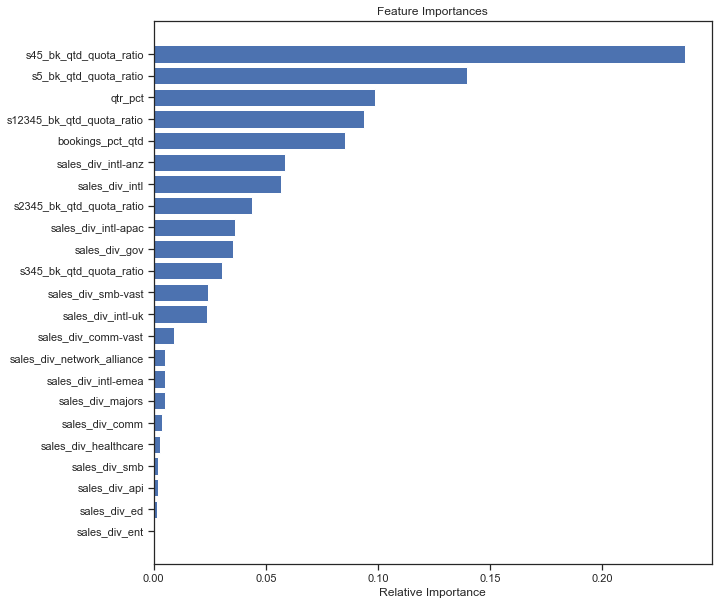

In [77]:
# Feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

features = X_train.columns[:X_train.shape[1]]
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

In [56]:
# export the y_test, compare with actuals

df = pd.concat([X_test_raw.reset_index(), y_test.reset_index(), y_test_hat.reset_index()], axis=1)
df.to_csv("/Users/derekwang/Desktop/Python/Sales Forecast/results_compare__2_random_forest.csv", sep=',')

In [57]:
#### predict for current quarter ####

# Load the current_quarter_data 
curr_data = pd.read_csv("/Users/derekwang/Desktop/Python/Sales Forecast/testing_data_FY20_Q1.csv")

# Define outcome
outcomes_raw_c = curr_data[['bookings_pct_finish']]

# Define features = removing outcome, dt, and fy_quarter label
features_raw_c1 = curr_data.drop(['direct_bookings', 'bookings_pct_finish'], axis = 1)

features_raw_c = features_raw_c1.drop(['dt', 
                                'fy_quarter', 
                                'day_of_qtr', 
                                'quota', 
                                'stage_1_count', 
                                'stage_1_amount', 
                                'stage_2_count', 
                                'stage_2_amount', 
                                'stage_3_count', 
                                'stage_3_amount', 
                                'stage_4_count', 
                                'stage_4_amount', 
                                'stage_5_count', 
                                'stage_5_amount', 
                                'bookings_qtd',
                                's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'       
                                      ], axis = 1)

# fill in NA's with 0 - FEATURES
features_c = features_raw_c.fillna(0.0)

# fill in NA's with 0 - OUTCOMES
outcomes_c = outcomes_raw.fillna(0.0)

# One-hot encoding
X_curr = pd.get_dummies(features_c)

# get rid of blanks in headers
X_curr.columns = X_curr.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# predict
y_curr = rf_tuned.predict(X_curr)

# flatten results
y_curr = y_curr.flatten()
y_curr = pd.DataFrame(y_curr)

# export prediciton
dfc = pd.concat([features_raw_c1.reset_index(), y_curr.reset_index()], axis=1)
dfc.to_csv("/Users/derekwang/Desktop/Python/Sales Forecast/curr_quarter_prediction__2_random_forest.csv", sep=',')